<a href="https://colab.research.google.com/github/WRMELO/projeto-rl/blob/main/agente_rl_treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [s1] Carregamento dos Dados de Treinamento

Nesta etapa, realizamos a importação dos arquivos `.csv` já preparados durante a fase de pré-processamento (notebook anterior).  
Os arquivos estão localizados em `/content/drive/MyDrive/rl/dados/` e serão utilizados para compor o ambiente `PortfolioEnv`.

Conjuntos esperados:
- Vetores de estado de cada ativo (`vale3`, `petr4`, `brfs3`);
- Vetor do portfólio do agente (posições + caixa).

**Objetivos desta célula:**
1. Garantir que todos os arquivos estão acessíveis;
2. Verificar a estrutura de colunas e número de registros;
3. Confirmar a presença da variável `Close_Original` nos ativos (para recompensas);
4. Confirmar a presença de `Cash_Norm` e posições no vetor de portfólio;
5. Assegurar que todos os vetores estão **sincronizados temporalmente** (mesmo número de linhas).


In [1]:
# Monta o Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# [s1] Código Python: Importação e verificação dos datasets

import pandas as pd

# Montagem dos caminhos
base_path = '/content/drive/MyDrive/rl/dados/'

# Leitura dos arquivos CSV
df_vale  = pd.read_csv(base_path + 'vale3_estado_treino.csv')
df_petr  = pd.read_csv(base_path + 'petr4_estado_treino.csv')
df_brfs  = pd.read_csv(base_path + 'brfs3_estado_treino.csv')
df_port  = pd.read_csv(base_path + 'vetor_portfolio_treino.csv')

# Exibição das primeiras linhas
print("✅ VALE3")
display(df_vale.head())
print(df_vale.columns)

print("\n✅ PETR4")
display(df_petr.head())
print(df_petr.columns)

print("\n✅ BRFS3")
display(df_brfs.head())
print(df_brfs.columns)

print("\n✅ PORTFÓLIO")
display(df_port.head())
print(df_port.columns)

# Verificação do tamanho dos datasets
print("\n🔍 Verificação de sincronização temporal:")
print(f"VALE3:   {len(df_vale)} linhas")
print(f"PETR4:   {len(df_petr)} linhas")
print(f"BRFS3:   {len(df_brfs)} linhas")
print(f"PORTF.:  {len(df_port)} linhas")


✅ VALE3


,Date,Close_Original,Close_Norm,SMA5,SMA20,Return_Z,Volatility_Z,RSI_Z,Volume_Log
0,2020-06-03,33.426662,1.165255,32.839857,31.326126,0.190740,0.930754,1.139709,17.268171
1,2020-06-04,34.672531,1.208686,33.533806,31.625447,1.838285,0.928893,1.374744,17.443541
2,2020-06-05,34.018452,1.185885,33.734392,31.804852,-0.983246,0.963439,0.661370,17.499355
3,2020-06-08,34.124348,1.189577,33.903830,32.024436,0.121386,0.925976,0.505928,17.128114
4,2020-06-09,34.255165,1.194137,34.099432,32.258971,0.157608,0.674396,0.507840,16.804218


Index(['Date', 'Close_Original', 'Close_Norm', 'SMA5', 'SMA20', 'Return_Z',
       'Volatility_Z', 'RSI_Z', 'Volume_Log'],
      dtype='object')

✅ PETR4


,Date,Close_Original,Close_Norm,SMA5,SMA20,Return_Z,Volatility_Z,RSI_Z,Volume_Log
0,2020-06-03,8.546755,1.231078,8.225106,7.585791,0.078623,0.365885,1.642585,18.272409
1,2020-06-04,8.530830,1.228784,8.357268,7.665208,-0.143866,0.338483,1.811068,18.492084
2,2020-06-05,8.797543,1.267202,8.497392,7.737260,1.291611,-0.030252,1.699474,18.552916
3,2020-06-08,8.968717,1.291858,8.672546,7.824440,0.779974,-0.248687,1.747916,18.227635
4,2020-06-09,8.646274,1.245413,8.698024,7.895696,-1.620986,0.381437,0.960987,18.384932


Index(['Date', 'Close_Original', 'Close_Norm', 'SMA5', 'SMA20', 'Return_Z',
       'Volatility_Z', 'RSI_Z', 'Volume_Log'],
      dtype='object')

✅ BRFS3


,Date,Close_Original,Close_Norm,SMA5,SMA20,Return_Z,Volatility_Z,RSI_Z,Volume_Log
0,2020-06-03,20.976498,1.230310,21.487714,20.384711,-1.008737,-0.393669,-0.148783,16.533583
1,2020-06-04,21.717390,1.273764,21.532167,20.618091,1.142426,-0.435614,0.358348,15.952520
2,2020-06-05,21.022804,1.233026,21.452521,20.801462,-1.074769,-0.162996,0.439488,16.338351
3,2020-06-08,21.532166,1.262901,21.374727,20.912596,0.777046,-0.107875,0.538805,16.043092
4,2020-06-09,21.365467,1.253123,21.322865,21.037621,-0.276183,-0.240885,0.286674,16.182895


Index(['Date', 'Close_Original', 'Close_Norm', 'SMA5', 'SMA20', 'Return_Z',
       'Volatility_Z', 'RSI_Z', 'Volume_Log'],
      dtype='object')

✅ PORTFÓLIO


,Date,Position_VALE3,Position_PETR4,Position_BRFS3,Cash_Norm
0,2020-06-03,0,0,0,1.0
1,2020-06-04,0,0,0,1.0
2,2020-06-05,0,0,0,1.0
3,2020-06-08,0,0,0,1.0
4,2020-06-09,0,0,0,1.0


Index(['Date', 'Position_VALE3', 'Position_PETR4', 'Position_BRFS3',
       'Cash_Norm'],
      dtype='object')

🔍 Verificação de sincronização temporal:
VALE3:   856 linhas
PETR4:   856 linhas
BRFS3:   856 linhas
PORTF.:  856 linhas


### [s2] Definição Inicial do Ambiente PortfolioEnv

Esta célula implementa a estrutura base do ambiente `PortfolioEnv`, compatível com a interface `gym.Env`.  
O ambiente será construído a partir dos dados carregados (treinamento) e fornecerá vetores de estado compostos por:

- Indicadores dos três ativos (`VALE3`, `PETR4`, `BRFS3`);
- Estado interno do agente (posições + caixa normalizada).

**Neste ponto:**
- As ações ainda **não impactam** o estado do portfólio;
- A função de recompensa está ausente;
- O método `step()` apenas avança no tempo, retornando o próximo estado.

Este esqueleto será expandido nas próximas células.


In [3]:
import numpy as np
import gym
from gym import spaces

class PortfolioEnv(gym.Env):
    def __init__(self, df_vale, df_petr, df_brfs, df_portfolio):
        super(PortfolioEnv, self).__init__()

        # Dados dos ativos e do portfólio
        self.df_vale = df_vale.reset_index(drop=True)
        self.df_petr = df_petr.reset_index(drop=True)
        self.df_brfs = df_brfs.reset_index(drop=True)
        self.df_port = df_portfolio.reset_index(drop=True)

        # Validação da sincronia
        n = len(self.df_vale)
        assert len(self.df_petr) == n and len(self.df_brfs) == n and len(self.df_port) == n, "Vetores fora de sincronia"

        # Número de ativos
        self.n_assets = 3

        # Passo atual (índice temporal)
        self.current_step = 0
        self.max_steps = n

        # Espaço de ação: [0=manter, 1=comprar, 2=vender] para cada ativo
        self.action_space = spaces.MultiDiscrete([3] * self.n_assets)

        # Espaço de observação: concatenação dos indicadores dos ativos + portfólio
        obs_size = (
            self.df_vale.shape[1] +
            self.df_petr.shape[1] +
            self.df_brfs.shape[1] +
            self.df_port.shape[1]
        )
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(obs_size,), dtype=np.float32)

    def _get_observation(self):
        ativos = np.concatenate([
            self.df_vale.iloc[self.current_step].values,
            self.df_petr.iloc[self.current_step].values,
            self.df_brfs.iloc[self.current_step].values
        ])
        portfolio = self.df_port.iloc[self.current_step].values
        return np.concatenate([ativos, portfolio]).astype(np.float32)

    def reset(self):
        self.current_step = 0
        return self._get_observation()

    def step(self, action):
        self.current_step += 1
        done = self.current_step >= self.max_steps - 1
        obs = self._get_observation()
        reward = 0.0  # ainda será implementado
        info = {}
        return obs, reward, done, info

    def render(self, mode='human'):
        print(f"Dia {self.current_step} | Estado: {self._get_observation()}")


### [s3] Instanciação e Teste do Ambiente `PortfolioEnv`

Nesta etapa, instanciamos a classe `PortfolioEnv` com os dados de treino previamente carregados e testamos seu funcionamento básico.

**Ajuste importante**:  
Durante a concatenação dos vetores de estado, é necessário **remover a coluna `'Date'`**, que é textual e não deve ser usada pelo agente. Isso evita erro de conversão para `float32`.

**Objetivos:**
- Verificar a inicialização do ambiente (`.reset()`);
- Observar o vetor de estado inicial;
- Executar um passo (`.step()`) com ação arbitrária;
- Confirmar o formato (`shape`) do vetor de estado.


In [4]:
# Redefinindo a classe com tratamento da coluna 'Date'

import numpy as np
import gym
from gym import spaces

class PortfolioEnv(gym.Env):
    def __init__(self, df_vale, df_petr, df_brfs, df_portfolio):
        super(PortfolioEnv, self).__init__()

        # Remove coluna 'Date' se estiver presente
        self.df_vale = df_vale.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_petr = df_petr.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_brfs = df_brfs.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_port = df_portfolio.drop(columns=['Date'], errors='ignore').reset_index(drop=True)

        # Validação da sincronia
        n = len(self.df_vale)
        assert len(self.df_petr) == n and len(self.df_brfs) == n and len(self.df_port) == n, "Vetores fora de sincronia"

        self.n_assets = 3
        self.current_step = 0
        self.max_steps = n

        self.action_space = spaces.MultiDiscrete([3] * self.n_assets)

        obs_size = (
            self.df_vale.shape[1] +
            self.df_petr.shape[1] +
            self.df_brfs.shape[1] +
            self.df_port.shape[1]
        )
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(obs_size,), dtype=np.float32)

    def _get_observation(self):
        ativos = np.concatenate([
            self.df_vale.iloc[self.current_step].values,
            self.df_petr.iloc[self.current_step].values,
            self.df_brfs.iloc[self.current_step].values
        ])
        portfolio = self.df_port.iloc[self.current_step].values
        return np.concatenate([ativos, portfolio]).astype(np.float32)

    def reset(self):
        self.current_step = 0
        return self._get_observation()

    def step(self, action):
        self.current_step += 1
        done = self.current_step >= self.max_steps - 1
        obs = self._get_observation()
        reward = 0.0
        info = {}
        return obs, reward, done, info

    def render(self, mode='human'):
        print(f"Dia {self.current_step} | Estado: {self._get_observation()}")

# Instanciação e teste
env = PortfolioEnv(df_vale, df_petr, df_brfs, df_port)

estado_inicial = env.reset()
print("📌 Estado inicial (shape):", estado_inicial.shape)
print(estado_inicial)

acao_teste = [0, 0, 0]
novo_estado, recompensa, done, info = env.step(acao_teste)

print("\n▶️ Estado após 1 passo:")
print("Novo estado (shape):", novo_estado.shape)
print("Recompensa:", recompensa)
print("Done:", done)


📌 Estado inicial (shape): (28,)
[33.426662    1.1652553  32.83986    31.326126    0.19074014  0.93075407
  1.1397092  17.268171    8.546755    1.231078    8.225106    7.5857916
  0.07862299  0.36588547  1.642585   18.27241    20.976498    1.2303097
 21.487713   20.38471    -1.0087371  -0.39366916 -0.1487825  16.533583
  0.          0.          0.          1.        ]

▶️ Estado após 1 passo:
Novo estado (shape): (28,)
Recompensa: 0.0
Done: False


### [s4] Implementação da Lógica de Ação e Recompensa no Ambiente

Esta célula estende o ambiente `PortfolioEnv` para permitir:

- Execução de ações do agente: **comprar (1)**, **vender (2)**, **manter (0)** por ativo;
- Atualização do portfólio do agente (posições e caixa);
- Cálculo do **valor total da carteira** com base nos preços reais (`Close_Original`);
- Cálculo da **recompensa diária** como variação do patrimônio líquido.

**Regras de movimentação:**
- Compras só são executadas se houver caixa ≥ preço do ativo;
- Vendas só são executadas se houver posição comprada;
- Caixa e posições são atualizados em tempo real;
- Custos de transação e penalidades serão adicionados em versões futuras.

O vetor de estado continua sendo composto pelos indicadores + posição + caixa.


In [5]:
class PortfolioEnv(gym.Env):
    def __init__(self, df_vale, df_petr, df_brfs, df_portfolio):
        super(PortfolioEnv, self).__init__()

        self.df_vale = df_vale.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_petr = df_petr.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_brfs = df_brfs.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_port = df_portfolio.drop(columns=['Date'], errors='ignore').reset_index(drop=True)

        self.n_assets = 3
        self.current_step = 0
        self.max_steps = len(self.df_vale)

        self.action_space = spaces.MultiDiscrete([3] * self.n_assets)

        obs_size = (
            self.df_vale.shape[1] +
            self.df_petr.shape[1] +
            self.df_brfs.shape[1] +
            self.df_port.shape[1]
        )
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(obs_size,), dtype=np.float32)

        # Inicialização do estado interno
        self.positions = [0] * self.n_assets
        self.cash = 1.0  # normalizado (equivalente a R$100.000)

    def _get_prices(self):
        """Retorna os preços reais dos ativos (Close_Original)"""
        p1 = self.df_vale.iloc[self.current_step]['Close_Original']
        p2 = self.df_petr.iloc[self.current_step]['Close_Original']
        p3 = self.df_brfs.iloc[self.current_step]['Close_Original']
        return [p1, p2, p3]

    def _get_observation(self):
        ativos = np.concatenate([
            self.df_vale.iloc[self.current_step].values,
            self.df_petr.iloc[self.current_step].values,
            self.df_brfs.iloc[self.current_step].values
        ])
        portfolio = np.array(self.positions + [self.cash])
        return np.concatenate([ativos, portfolio]).astype(np.float32)

    def reset(self):
        self.current_step = 0
        self.positions = [0] * self.n_assets
        self.cash = 1.0
        return self._get_observation()

    def step(self, action):
        assert len(action) == self.n_assets
        prices = self._get_prices()

        # Valor anterior da carteira
        valor_anterior = self.cash + sum([q * p for q, p in zip(self.positions, prices)])

        # Executa as ações
        for i in range(self.n_assets):
            if action[i] == 1:  # comprar
                if self.cash >= prices[i] and self.positions[i] == 0:
                    self.cash -= prices[i]
                    self.positions[i] += 1
            elif action[i] == 2:  # vender
                if self.positions[i] > 0:
                    self.cash += prices[i]
                    self.positions[i] -= 1

        # Avança no tempo
        self.current_step += 1
        done = self.current_step >= self.max_steps - 1

        # Novo valor da carteira
        prices = self._get_prices()
        valor_atual = self.cash + sum([q * p for q, p in zip(self.positions, prices)])

        # Recompensa: variação no patrimônio líquido
        reward = valor_atual - valor_anterior

        obs = self._get_observation()
        info = {
            'valor_anterior': valor_anterior,
            'valor_atual': valor_atual,
            'positions': self.positions.copy(),
            'cash': self.cash
        }

        return obs, reward, done, info

    def render(self, mode='human'):
        print(f"Step {self.current_step} | Posições: {self.positions} | Caixa: {self.cash:.2f}")


### [s5] Simulação de Episódio com Ações Fixas

Esta célula simula um episódio simples de 10 dias, onde o agente executa ações fixas:
- Compra VALE3 no primeiro dia;
- Mantém posições nos dias seguintes.

**Objetivos:**
- Observar a atualização de `positions` e `cash`;
- Acompanhar o valor da carteira ao longo do tempo;
- Confirmar que a recompensa corresponde à variação patrimonial.



In [6]:
class PortfolioEnv(gym.Env):
    def __init__(self, df_vale, df_petr, df_brfs, df_portfolio):
        super(PortfolioEnv, self).__init__()

        self.df_vale = df_vale.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_petr = df_petr.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_brfs = df_brfs.drop(columns=['Date'], errors='ignore').reset_index(drop=True)
        self.df_port = df_portfolio.drop(columns=['Date'], errors='ignore').reset_index(drop=True)

        self.n_assets = 3
        self.current_step = 0
        self.max_steps = len(self.df_vale)

        self.action_space = spaces.MultiDiscrete([3] * self.n_assets)

        obs_size = (
            self.df_vale.shape[1] +
            self.df_petr.shape[1] +
            self.df_brfs.shape[1] +
            self.df_port.shape[1]
        )
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(obs_size,), dtype=np.float32)

        # Inicializa com R$100.000,00 em caixa
        self.cash = 100_000.0
        self.positions = [0] * self.n_assets

    def _get_prices(self):
        return [
            self.df_vale.iloc[self.current_step]['Close_Original'],
            self.df_petr.iloc[self.current_step]['Close_Original'],
            self.df_brfs.iloc[self.current_step]['Close_Original']
        ]

    def _get_observation(self):
        ativos = np.concatenate([
            self.df_vale.iloc[self.current_step].values,
            self.df_petr.iloc[self.current_step].values,
            self.df_brfs.iloc[self.current_step].values
        ])
        portfolio = np.array(self.positions + [self.cash])
        return np.concatenate([ativos, portfolio]).astype(np.float32)

    def reset(self):
        self.current_step = 0
        self.cash = 100_000.0
        self.positions = [0] * self.n_assets
        return self._get_observation()

    def step(self, action):
        assert len(action) == self.n_assets
        prices = self._get_prices()
        valor_anterior = self.cash + sum([q * p for q, p in zip(self.positions, prices)])

        for i in range(self.n_assets):
            if action[i] == 1:  # comprar
                if self.cash >= prices[i] and self.positions[i] == 0:
                    self.cash -= prices[i]
                    self.positions[i] += 1
            elif action[i] == 2:  # vender
                if self.positions[i] > 0:
                    self.cash += prices[i]
                    self.positions[i] -= 1

        self.current_step += 1
        done = self.current_step >= self.max_steps - 1
        prices = self._get_prices()
        valor_atual = self.cash + sum([q * p for q, p in zip(self.positions, prices)])

        reward = valor_atual - valor_anterior

        obs = self._get_observation()
        info = {
            'valor_anterior': valor_anterior,
            'valor_atual': valor_atual,
            'positions': self.positions.copy(),
            'cash': self.cash
        }
        return obs, reward, done, info

    def render(self, mode='human'):
        print(f"Step {self.current_step} | Posições: {self.positions} | Caixa: R${self.cash:,.2f}")


In [7]:
# Instancia o ambiente
env = PortfolioEnv(df_vale, df_petr, df_brfs, df_port)

# Reinicia o ambiente
obs = env.reset()

# Estratégia de ação fixa: [1, 0, 0] (compra VALE3 no início, depois só mantém)
acoes = [[1, 0, 0]] + [[0, 0, 0]] * 9

print("📊 Simulação de 10 dias com ações fixas:\n")
for dia, acao in enumerate(acoes):
    obs, recompensa, done, info = env.step(acao)
    print(f"Dia {dia+1:02d} | Ação: {acao} | Recompensa: {recompensa:.4f} | "
          f"Posições: {info['positions']} | Caixa: {info['cash']:.2f} | "
          f"Valor Total: {info['valor_atual']:.2f}")
    if done:
        print("🔚 Episódio encerrado.")
        break


📊 Simulação de 10 dias com ações fixas:

Dia 01 | Ação: [1, 0, 0] | Recompensa: 1.2459 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 100001.25
Dia 02 | Ação: [0, 0, 0] | Recompensa: -0.6541 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 100000.59
Dia 03 | Ação: [0, 0, 0] | Recompensa: 0.1059 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 100000.70
Dia 04 | Ação: [0, 0, 0] | Recompensa: 0.1308 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 100000.83
Dia 05 | Ação: [0, 0, 0] | Recompensa: -0.4921 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 100000.34
Dia 06 | Ação: [0, 0, 0] | Recompensa: -0.4984 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 99999.84
Dia 07 | Ação: [0, 0, 0] | Recompensa: 0.2990 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 100000.14
Dia 08 | Ação: [0, 0, 0] | Recompensa: 0.9406 | Posições: [1, 0, 0] | Caixa: 99966.57 | Valor Total: 100001.08
Dia 09 | Ação: [0, 0, 0] | Recompensa: 0.5046 | Posições: [1, 0, 0] |

### [s6] Definição do Replay Buffer e da Rede Neural DQN

Nesta célula, implementamos:

1. **ReplayBuffer**: memória de transições para aprendizado estável, com amostragem aleatória.
2. **DQN**: rede neural que aproxima a função Q(s, a), com arquitetura leve e eficiente.

**Arquitetura do DQN:**
- Entrada: vetor de estado (28 features);
- Camadas ocultas: 128 → 64 neurônios (ReLU);
- Saída: 27 neurônios (3 ações por ativo × 3 ativos);
- Otimizador: será definido na etapa de treinamento.

**Uso futuro de GPU (Colab):** A rede já é compatível com `cuda`. Avisarei quando ativar.

O Replay Buffer será usado para armazenar `(estado, ação, recompensa, próximo_estado, done)`.


In [8]:
import torch
import torch.nn as nn
import random
import numpy as np

# Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity, device):
        self.capacity = capacity
        self.buffer = []
        self.position = 0
        self.device = device

    def push(self, state, action, reward, next_state, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states      = torch.tensor(np.array(states), dtype=torch.float32).to(self.device)
        actions     = torch.tensor(np.array(actions), dtype=torch.int64).to(self.device)
        rewards     = torch.tensor(np.array(rewards), dtype=torch.float32).to(self.device)
        next_states = torch.tensor(np.array(next_states), dtype=torch.float32).to(self.device)
        dones       = torch.tensor(np.array(dones), dtype=torch.float32).to(self.device)

        return states, actions, rewards, next_states, dones

    def __len__(self):
        return len(self.buffer)

# Rede DQN
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.net(x)


### [s7] Instanciação do DQN, Rede-Alvo e Replay Buffer

Nesta célula, inicializamos:

- `device`: define se o modelo rodará em GPU ou CPU;
- `q_net`: rede DQN principal;
- `q_target`: rede-alvo (target network), que estabiliza o aprendizado;
- `buffer`: ReplayBuffer com capacidade definida.

**Importante:**  
- Esta etapa **ainda não realiza treinamento**.
- Se `cuda` estiver disponível no ambiente, será usada automaticamente.
- O número de ações é 3 (ações por ativo) × 3 ativos = **9 ações totais** (codificadas de forma achatada).


In [9]:
# Detecta uso de GPU (ativa automaticamente se estiver disponível)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Dispositivo ativo:", device)

# Dimensões do estado e ação
input_dim = env.observation_space.shape[0]  # ex: 28
output_dim = 3 * env.n_assets  # 3 ações por ativo × 3 ativos = 9

# Instanciação das redes
q_net = DQN(input_dim=input_dim, output_dim=output_dim).to(device)
q_target = DQN(input_dim=input_dim, output_dim=output_dim).to(device)
q_target.load_state_dict(q_net.state_dict())  # inicializa pesos iguais

# Replay buffer
buffer = ReplayBuffer(capacity=10_000, device=device)


✅ Dispositivo ativo: cuda


### [s8 - Final e Corrigida] Treinamento DQN com Espaço de Ação Compactado (27 Ações)

Esta versão completa do treinamento inclui:
- Imports corretos para CUDA e otimizador;
- Espaço de ação indexado (0 a 26);
- Buffer e redes reinicializados corretamente;
- Política ε-greedy com decaimento e atualização da rede-alvo.

Recomenda-se GPU ativa (T4) no Colab para boa performance.


In [11]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

# 🔁 Ambiente já deve estar carregado e `env` instanciado corretamente
input_dim = env.observation_space.shape[0]
output_dim = 27  # 3 ações por ativo, 3 ativos → 3^3 = 27 combinações

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Dispositivo ativo:", device)

# Funções auxiliares
def vetor_para_indice(acao):
    return acao[0] * 9 + acao[1] * 3 + acao[2]

def indice_para_vetor(indice):
    return [indice // 9, (indice % 9) // 3, indice % 3]

# Reinstancia redes limpas
q_net = DQN(input_dim=input_dim, output_dim=output_dim).to(device)
q_target = DQN(input_dim=input_dim, output_dim=output_dim).to(device)
q_target.load_state_dict(q_net.state_dict())

# Buffer e otimizador
buffer = ReplayBuffer(capacity=10_000, device=device)
optimizer = optim.Adam(q_net.parameters(), lr=1e-4)

# Hiperparâmetros
num_episodes = 300
batch_size = 64
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.995
target_update_freq = 10

# Métricas
rewards_por_episodio = []

for ep in range(1, num_episodes + 1):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Política ε-greedy
        if np.random.rand() < epsilon:
            action_idx = np.random.choice(output_dim)
        else:
            with torch.no_grad():
                q_values = q_net(torch.tensor(state, dtype=torch.float32).to(device))
                action_idx = q_values.argmax().item()

        action = indice_para_vetor(action_idx)
        next_state, reward, done, _ = env.step(action)

        buffer.push(state, action_idx, reward, next_state, done)
        state = next_state
        total_reward += reward

        if len(buffer) > batch_size:
            states, action_idxs, rewards_b, next_states, dones = buffer.sample(batch_size)

            q_vals = q_net(states)
            q_selected = q_vals.gather(1, action_idxs.unsqueeze(1)).squeeze(1)

            with torch.no_grad():
                next_q_vals = q_target(next_states)
                max_next_q = next_q_vals.max(1)[0]
                q_targets = rewards_b + gamma * max_next_q * (1 - dones)

            loss = nn.MSELoss()(q_selected, q_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    if ep % target_update_freq == 0:
        q_target.load_state_dict(q_net.state_dict())

    rewards_por_episodio.append(total_reward)

    if ep % 10 == 0:
        media_10 = np.mean(rewards_por_episodio[-10:])
        print(f"🎯 Episódio {ep:03d} | Média últimas 10: {media_10:.2f} | ε={epsilon:.3f}")


✅ Dispositivo ativo: cuda
🎯 Episódio 010 | Média últimas 10: 32.49 | ε=0.951
🎯 Episódio 020 | Média últimas 10: 20.66 | ε=0.905
🎯 Episódio 030 | Média últimas 10: 16.65 | ε=0.860
🎯 Episódio 040 | Média últimas 10: 13.63 | ε=0.818
🎯 Episódio 050 | Média últimas 10: 17.67 | ε=0.778
🎯 Episódio 060 | Média últimas 10: 11.97 | ε=0.740
🎯 Episódio 070 | Média últimas 10: 12.57 | ε=0.704
🎯 Episódio 080 | Média últimas 10: 19.24 | ε=0.670
🎯 Episódio 090 | Média últimas 10: 21.26 | ε=0.637
🎯 Episódio 100 | Média últimas 10: 16.39 | ε=0.606
🎯 Episódio 110 | Média últimas 10: 29.04 | ε=0.576
🎯 Episódio 120 | Média últimas 10: 31.35 | ε=0.548
🎯 Episódio 130 | Média últimas 10: 23.30 | ε=0.521
🎯 Episódio 140 | Média últimas 10: 15.06 | ε=0.496
🎯 Episódio 150 | Média últimas 10: 29.98 | ε=0.471
🎯 Episódio 160 | Média últimas 10: 9.68 | ε=0.448
🎯 Episódio 170 | Média últimas 10: 19.70 | ε=0.427
🎯 Episódio 180 | Média últimas 10: 21.02 | ε=0.406
🎯 Episódio 190 | Média últimas 10: 21.50 | ε=0.386
🎯 Epis

### [s9] Avaliação do Agente em Dados de Validação

Nesta célula, avaliamos o desempenho do agente treinado sobre o conjunto **vale3_estado_valid.csv**, **petr4_estado_valid.csv**, **brfs3_estado_valid.csv** e **vetor_portfolio_valid.csv**.

**Política ε-greedy desativada**: o agente agora age exclusivamente com base na política aprendida (`ε = 0.0`).

### Métricas calculadas:
- **Lucro Total (R$)**: diferença entre patrimônio inicial e final.
- **Sharpe Ratio**: média dos retornos diários dividido pelo desvio padrão (assumindo rf = 0).
- **Máximo Drawdown**: pior perda desde o pico.
- **Gráfico de evolução patrimonial**


💰 Lucro Total: R$ 6.78
📈 Sharpe Ratio: 0.06
📉 Máximo Drawdown: R$ 5.33 (0.01%)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


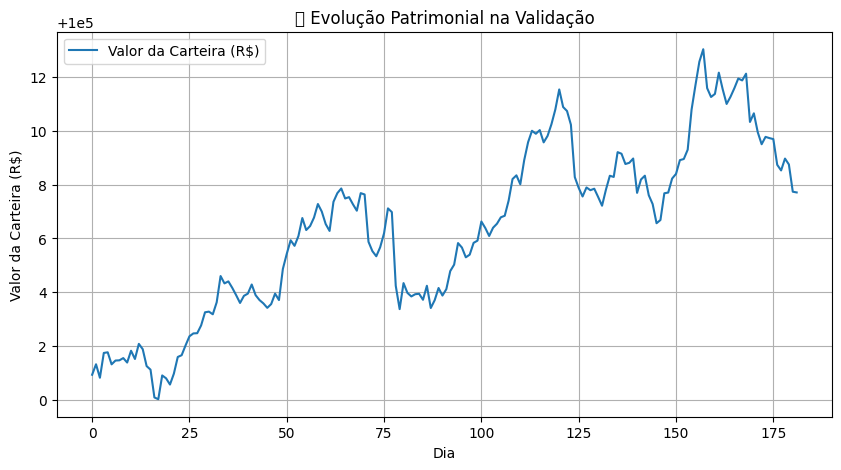

In [12]:
# Carregamento dos dados de validação
base_path = '/content/drive/MyDrive/rl/dados/'

df_vale_v  = pd.read_csv(base_path + 'vale3_estado_valid.csv').drop(columns=['Date'], errors='ignore')
df_petr_v  = pd.read_csv(base_path + 'petr4_estado_valid.csv').drop(columns=['Date'], errors='ignore')
df_brfs_v  = pd.read_csv(base_path + 'brfs3_estado_valid.csv').drop(columns=['Date'], errors='ignore')
df_port_v  = pd.read_csv(base_path + 'vetor_portfolio_valid.csv').drop(columns=['Date'], errors='ignore')

# Ambiente com dados de validação
env_val = PortfolioEnv(df_vale_v, df_petr_v, df_brfs_v, df_port_v)

# Simulação da política aprendida (ε = 0.0)
state = env_val.reset()
done = False
patrimonios = []

while not done:
    with torch.no_grad():
        q_vals = q_net(torch.tensor(state, dtype=torch.float32).to(device))
        action_idx = q_vals.argmax().item()
        action = indice_para_vetor(action_idx)
    next_state, reward, done, info = env_val.step(action)
    state = next_state
    patrimonios.append(info['valor_atual'])

# Conversão para np.array
patrimonios = np.array(patrimonios)

# Métricas
lucro_total = patrimonios[-1] - patrimonios[0]
retornos = np.diff(patrimonios) / patrimonios[:-1]
sharpe = np.mean(retornos) / np.std(retornos) if np.std(retornos) != 0 else 0

max_drawdown = np.max(np.maximum.accumulate(patrimonios) - patrimonios)
drawdown_perc = max_drawdown / np.max(patrimonios)

# Exibição
print(f"💰 Lucro Total: R$ {lucro_total:.2f}")
print(f"📈 Sharpe Ratio: {sharpe:.2f}")
print(f"📉 Máximo Drawdown: R$ {max_drawdown:.2f} ({drawdown_perc:.2%})")

# Gráfico da curva de patrimônio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(patrimonios, label='Valor da Carteira (R$)')
plt.title("📊 Evolução Patrimonial na Validação")
plt.xlabel("Dia")
plt.ylabel("Valor da Carteira (R$)")
plt.legend()
plt.grid(True)
plt.show()
